# [T-Academy X KaKr] 성인 인구조사 소득 예측 대회

### 목적: 94년 미국 성인을 대상으로 한 조사를 통해 연소득이 $50,000 이 넘는지 안 넘는지 구분하기

# Load Library

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [20]:
data = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/train.csv')
df = data.copy()
print(df.shape)
df.head()

(26049, 16)


id  age workclass  fnlwgt     education  education_num      marital_status  \
0   0   40   Private  168538       HS-grad              9  Married-civ-spouse   
1   1   17   Private  101626           9th              5       Never-married   
2   2   18   Private  353358  Some-college             10       Never-married   
3   3   21   Private  151158  Some-college             10       Never-married   
4   4   24   Private  122234  Some-college             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              60  United-States   >50K  
1             0              20  United-States  <=50K  
2             0              16  United-States  <=50K  
3             0              25  United-States  <=50K  
4             0              20              ?  <=50K

In [4]:
data_test = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/test.csv')
df_t = data_test.copy()
print(df_t.shape)
df_t.head()

(6512, 15)


id  age     workclass  fnlwgt     education  education_num  \
0   0   28       Private   67661  Some-college             10   
1   1   40  Self-emp-inc   37869       HS-grad              9   
2   2   20       Private  109952  Some-college             10   
3   3   40       Private  114537     Assoc-voc             11   
4   4   37       Private   51264     Doctorate             16   

       marital_status         occupation    relationship   race     sex  \
0       Never-married       Adm-clerical  Other-relative  White  Female   
1  Married-civ-spouse    Exec-managerial         Husband  White    Male   
2       Never-married  Handlers-cleaners       Own-child  White    Male   
3  Married-civ-spouse    Exec-managerial         Husband  White    Male   
4  Married-civ-spouse     Prof-specialty         Husband  White    Male   

   capital_gain  capital_loss  hours_per_week native_country  
0             0             0              40  United-States  
1             0             0              50  United-States  
2             0             0              25  United-States  
3             0             0              50  United-States  
4             0             0              99         France

# Data Profiling

In [5]:
profile = df.profile_report()
profile

# Data Profile

###### 요약 

1. 총 26049 row, 6columns
2. null 값이 없다!

###### Columns 설명

* id: 각 개인의 고유한 ID


* age : 나이
  * 17세에서 90세까지
  * 누운 호리병 모양의 분포를 보여줍니다.
  
  
* workclass : 고용 형태
  * 총 9개의 고용 형태입니다.
    * Private: 자영업, 18123명, 69.6%	 
    * Self-emp-not-inc: 법인 없는 개인 사업가, 2030명, 7.8%	 
    * Local-gov: Local 정부 소속, 1692명, 6.5%	 
    * ?: 직업 알 수 없음, 1502명,	5.8%	 
    * State-gov: State 정부 소속, 1043명, 4.0%
    * Self-emp-inc: 법인이 있는 개인 사업가, 877명, 3.4%	 
    * Federal-gov: Federal 정부 소속, 765명,	2.9%	 
    * Without-pay: 돈 안 받음.., 11명, < 0.1%	 
    * Never-worked: 일 안 함, 6명, < 0.1%
    
    
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
  * 사후 층화 가중치, 한 표본이 몇 개를 대표하는지 의미합니다. 
    (e.g. 모집단의 남녀 비율이 45%,55%인데 표본에서 60%,40% 일 경우 가중치를 주어 조정을 해줍니다.)
  * 값이 168538 일 경우, 이런 특성 가진 사람이 168538명 있다 라는 의미
  * 최솟값 ~ 최댓값 (13769 ~ 	1484705)
 
 
* education : 교육 수준
  * 총 16개의 교육 수준을 나타냅니다.
    * Bachelors(4년제학사)
    * Some-college(전문대)
    * 11th
    * HS-grad
    * Prof-school
    * Assoc-acdm 
    * Assoc-voc 
    * 9th
    * 7th-8th
    * 12th
    * Masters
    * 1st-4th
    * 10th
    * Doctorate
    * 5th-6th
    * Preschool
  
  
* education_num : 교육 수준 수치 (교육 받은 햇수)
  * education을 친절하게도 햇수로 표현했습니다.
  * 높을 수록 교육을 오래 받았습니다.
  
  
* marital_status: 결혼 상태
  * Married-civ-spouse: 기혼,	11970명,	46.0%	 
  * Never-married: 미혼, 8568명, 32.9%	 
  * Divorced: 이혼, 3536명, 13.6%	 
  * Separated: 별거(법적 별거, 결혼 불화, 이혼 직전 등), 826명, 3.2%	 
  * Widowed: 사별, 796명, 3.1%	 
  * Married-spouse-absent: 별거(직업 등의 사유로), 334명,	1.3%	 
  * Married-AF-spouse: 별거(군인), 19명,	0.1%


* occupation : 업종(직업)
  * 총 15개 업종
  * Tech-support(기술자), Craft-repair(기능공), Other-service(제3서비스업), Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.


* relationship : 가족 관계
  * Husband: 남편	10541	40.5%	 
  * Not-in-family: 가족없음	6632	25.5%	 
  * Own-child: 아이 있음	4099	15.7%	 
  * Unmarried: 결혼 안 함	2740	10.5%	 
  * Wife: 아내	1260	4.8%	 
  * Other-relative: 그 외 관계	777	3.0%


* race : 인종
  * White	22315	85.7%	 
  * Black	2476	9.5%	 
  * Asian-Pac-Islander	800	3.1%	 
  * Amer-Indian-Eskimo	254	1.0%	 
  * Other	204	0.8%	


* sex : 성별
  * Male	17482	67.1%	 
  * Female	8567	32.9%


* capital_gain : 양도 소득, 자본 소득
  * 0에서 99999 까지 인데 추가 확인 필요


* capital_loss : 양도 손실
  * 0에서 4356


* hours_per_week : 주당 근무 시간
  * 1시간에서 99시간까지


* native_country : 국적
  * 총 41개국
  
  
* income : 수익 (예측해야 하는 값)
  * 50K 이하	19744	75.8%	 
  * 50K 초과	6305	24.2%

In [8]:
# 94년 미국에서 연소득 5만 달라는 어느 정도 일까?
# 답: 중상층~재벌이다.
# 94년 미국 GNI (1인당 국민소득): 27,750 달러 / 18년 63,690
# 94년 한국 GNI: 9,910 달러 / 18년 40,090 달러 (4천5백만원)

# Data Cleaning

In [21]:
# 각 컬럼들과 income과의 상관관계를 먼저 보려합니다.
# 컬럼들을 정리하고, one hot 인코딩해줍니다.

# 1. education 컬럼은 education_num 컬럼으로 대체 가능하니 버려줍니다.
df = df.drop('education', axis = 1)
print(df.shape)
df.head()

(26049, 15)


id  age workclass  fnlwgt  education_num      marital_status  \
0   0   40   Private  168538              9  Married-civ-spouse   
1   1   17   Private  101626              5       Never-married   
2   2   18   Private  353358             10       Never-married   
3   3   21   Private  151158             10       Never-married   
4   4   24   Private  122234             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              60  United-States   >50K  
1             0              20  United-States  <=50K  
2             0              16  United-States  <=50K  
3             0              25  United-States  <=50K  
4             0              20              ?  <=50K

In [22]:
# 2. income 컬럼의 값은 True, False로 대체합니다.
df['income_bool'] = df['income'] == '>50K'
print(df.shape)
df[['income','income_bool']].head()

(26049, 16)


income  income_bool
0   >50K         True
1  <=50K        False
2  <=50K        False
3  <=50K        False
4  <=50K        False

In [44]:
#3. fnlwgt 컬럼은 사후 층화 가중치로서, 한 표본이 몇 개를 대표하는지 의미합니다.
'https://m.blog.naver.com/stat833/221747335785'
df_fnlwgt = df.head(1)
df_fnlwgt.drop(df_fnlwgt.index[0], inplace = True)
df_fnlwgt

/home/theo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Empty DataFrame
Columns: [id, age, workclass, fnlwgt, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, income_bool]
Index: []

In [54]:
# fnlwgt 수만큼 같은 데이터를 만들어볼까?
# 컴퓨터 성능이 허락하질 않는다..

for i in range(1,df['fnlwgt'].shape[0]+1):
    print(i)
    for j in range(0, int(df['fnlwgt'][i])):
        df_fnlwgt = df_fnlwgt.append(df.head(i) ,ignore_index=True)
    
df_fnlwgt

168538

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
df_num = df.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
print(df_num.shape)
df_num.tail(10)

(26049, 16)


id  age  workclass  fnlwgt  education_num  marital_status  \
26039  26039   52          1  129177              9               0   
26040  26040   39          4   30269             11               0   
26041  26041   44          4  103233             13               4   
26042  26042   48          6  191389             10               5   
26043  26043   34          6  234960             13               2   
26044  26044   57          4  250201              7               2   
26045  26045   23          4  238092             13               4   
26046  26046   78          0  165694             14               6   
26047  26047   26          6  151626              9               4   
26048  26048   20          0   99891             10               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
26039           1             1     4    0             0             0   
26040          12             4     4    0             0             0   
26041           1             4     2    0             0             0   
26042          12             4     4    0             0             0   
26043          10             0     2    1             0          1887   
26044           8             0     4    1             0             0   
26045          10             3     4    1             0             0   
26046           0             1     4    0             0             0   
26047          10             3     2    0             0             0   
26048           0             3     4    0             0             0   

       hours_per_week  native_country  income  income_bool  
26039              40              38       0        False  
26040              40              38       0        False  
26041              40              38       0        False  
26042              50              38       0        False  
26043              48              38       1         True  
26044              52              38       0        False  
26045              40              38       0        False  
26046              15              38       0        False  
26047              40              38       0        False  
26048              30              38       0        False

<AxesSubplot:>

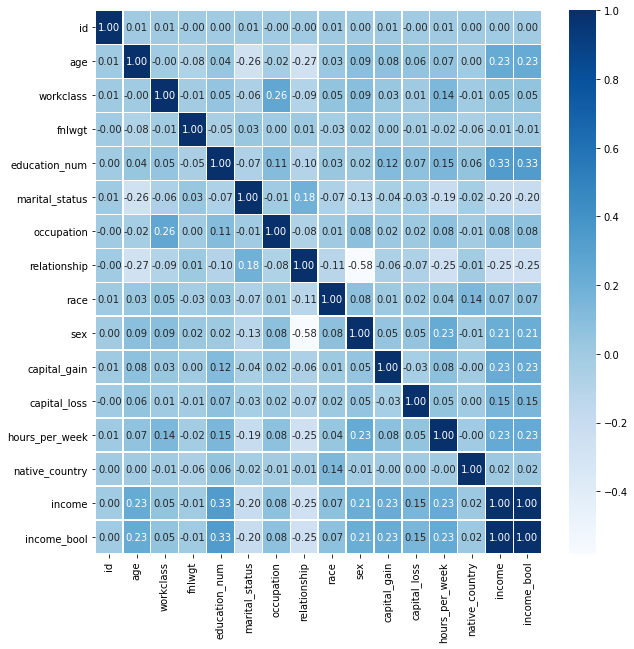

In [57]:
# 상관관계 heatmap

plt.figure(figsize=(10,10))
sns.heatmap(data = df_num.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# age, education_num, marital_status, relationship, sex, capital_gain, capital_loss, hours_per_week 가 연관있어 보인다.

# EDA

* 상관관계가 높은 아래 컬럼들을 살펴보자

  1. age, 
  2. education_num, 
  3. marital_status, 
  4. relationship, 
  5. sex, 
  6. capital_gain, 
  7. capital_loss, 
  8. hours_per_week

## 1. age

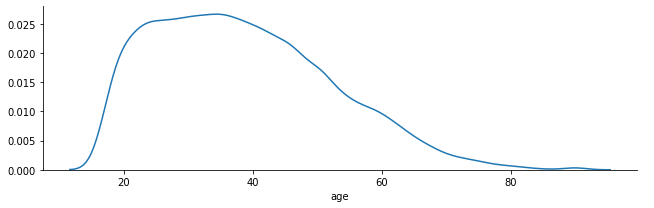

In [71]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()
# 코끼리를 삼킨 보아뱀 모양 그래프, 아직 코끼리가 식도에 있어서 위장쪽으로 옮겨줘야합니다.

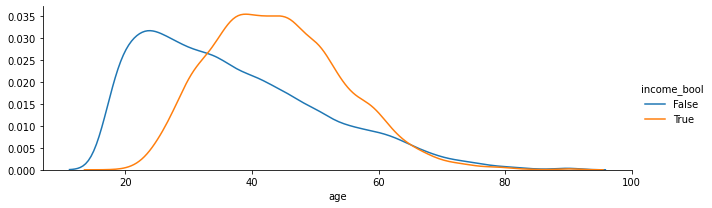

In [73]:
# income을 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()

# 대략 구분해보면 40~50대에 돈이 많고, 20대에는 돈이 없습니다. 늙어서는 다 똑같습니다..

## 2. education_num

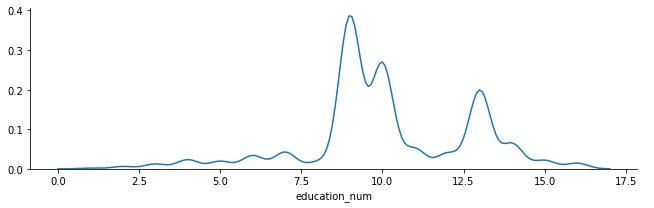

In [74]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()
# 들쭉 날쭉합니다. 대충 중졸, 고졸, 대졸, 대학원졸 그룹으로 나눌 수 있을 것 같습니다.

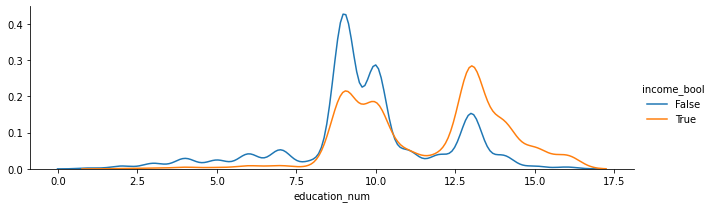

In [75]:
# income 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()
# 공부 많이 하면 돈도 많이 법니다.

## 3. marital_status

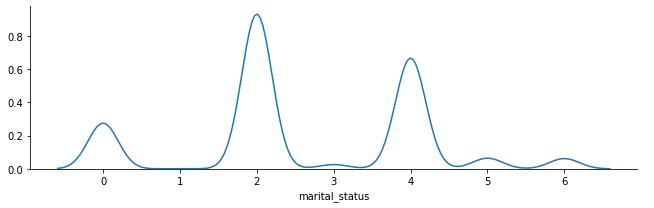

In [91]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 결혼 상태 입니다. 0, 2, 4의 상태가 두드러집니다. 인코딩이 되어 있어 어떤 상태인지 알 수 없습니다.

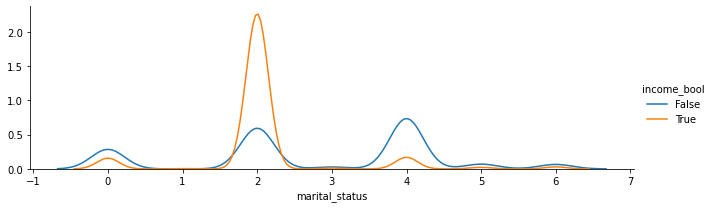

In [83]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 부자가 되려면 가족 상태는 2를 지향해야 할 것 같습니다. 2는 어떤 상태일까요?

In [87]:
pd.pivot_table(data = df_num, index = 'marital_status', values = 'income_bool', aggfunc = np.sum)

income_bool
marital_status             
0                       371
1                        10
2                      5372
3                        27
4                       401
5                        54
6                        70

In [92]:
pd.pivot_table(data = df, index = 'marital_status', values = 'income_bool', aggfunc = np.sum)
# 소득이 높은 사람은 결혼했을 확률이 높습니다.

income_bool
marital_status                    
Divorced                       371
Married-AF-spouse               10
Married-civ-spouse            5372
Married-spouse-absent           27
Never-married                  401
Separated                       54
Widowed                         70

## 4. relationship

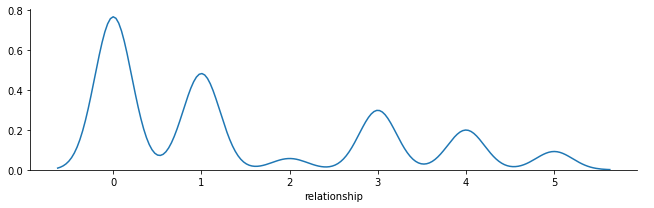

In [93]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()

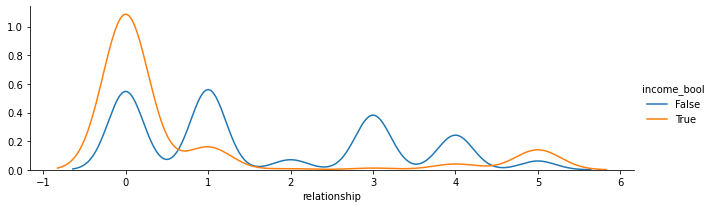

In [94]:
fa = sns.FacetGrid(df_num, hue = 'income_bool',aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()

In [ ]:
import os
csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
df = pd.read_csv(csv_file_path)
print(df.shape)
df.head()

# Load Data

# AUTO ML 만들기

### 1 가장 간단한 형태

In [ ]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 데이터를 받아서 분리해준다
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.4,
                                                   random_state = 31)

# 3. For문을 활용해서 모델을 돌려볼까요?
def run():
    result = dict()
    for model_name, model in models_list.items():
        train_model = model
        train_model.fit(X_train, y_train)
        y_pred = train_model.predict(X_test)
        
        fig, axes = plt.subplots(nrows = 1, ncols =1)
        fig.set_size_inches(12, 10)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = axes)
    
        result[model_name] = classification_report(y_test, y_pred)

    return result

# 4. 결과도 확인해보고
result = run()
print(result['DecisionTreeClassifier'])

# 2. 함수로 짜볼까?

In [ ]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 사용할 데이터 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

data_list =  {'breast_cancer': load_breast_cancer(),
             'wine': load_wine(),
             'digits': load_digits()}


# 3. 함수로 만들어 보기
def run(var):
    data_set = data_list[var]
    X = data_set.data
    Y = data_set.target
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                       Y,
                                                       test_size = 0.4,
                                                       random_state = 31)
    
    
    for model_name, model in models_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        fig, axes = plt.subplots(nrows = 1, ncols =1)
        fig.set_size_inches(12, 10)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = axes)
    

In [ ]:
run('wine')

# 3. 클래스로 짜볼까?

In [ ]:
# 모듈 import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}

# 2. 사용할 데이터 import
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits


# 3. 클래스로 만들어 보기

class AutoML:
    
    def __init__(self, data, test_size, model):
        
        # 모델 리스트
        models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}
        
        # 데이터 리스트
        data_list =  {'breast_cancer': load_breast_cancer(),
             'wine': load_wine(),
             'digits': load_digits()}
        
        self.data = data_list[data]
        self.test_size = test_size
        self.model = models_list[model]
        
        # Feature, target 나누기
        X = self.data.data
        Y = self.data.target
        
        # train, test 데이터 나누기
        X_train, y_train, X_test, y_test = train_test_split(X,
                                                           Y,
                                                           test_size = self.test_size,
                                                           random_state = 31)
    
    def fit(self):
        self.fit = self.model.fit(X_train, y_train)
        
    def predict(self):
        self.predict = self.model.predict(X_test)
        
    def show(self, insight):
        #insight = accuracy_score, classification_report, confusion_matrix
        self.show = insight(y_test, self.predict)
        
        if insight == confusion_matrix:
            fig, axes = plt.subplots(nrows = 1, ncols =1)
            fig.set_size_inches(12, 10)
            sns.heatmap(confusion_matrix(y_test, self.predict), annot=True, ax = axes)
        else:
            print(self.show)

In [ ]:
automl = AutoML(data = 'wine', test_size = 31, model = 'RandomForestClassifier')
automl.fit()
automl.predict()
automl.show(insight=confusion_matrix)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

class AutoML2:

    
    def __init__(self, data='wine', test_size=0.2):
            
        data_list = {
            'wine': load_wine,
            'breast_cancer': load_breast_cancer,
            'digits': load_digits,
            }

        modelss = {
            'DecisionTreeClassifier': DecisionTreeClassifier,
            'RandomForestClassifier': RandomForestClassifier,
            'SVC': SVC,
            'SGDClassifier': SGDClassifier,
            'LogisticRegression': LogisticRegression
            }
    
        self.dataset = data_list[data]()
        X, y = self.dataset.data, self.dataset.target
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.models, self.results = dict(), dict()
        
        
    def fit(self):
        
        for name, model in modelss.items():
    
            classifier = model()
            classifier.fit(self.X_train, self.y_train)
            self.models[name] = classifier
            
            
    def predict(self):
        
        for name, model in self.modelss.items():
            
            y_pred = model.predict(self.X_test)
            self.results[name] = {
                'accuracy_score': accuracy_score(self.y_test, y_pred),
                'classification_report': classification_report(self.y_test, y_pred),
                'confusion_matrix': confusion_matrix(self.y_test, y_pred)
            }
            
    def show(self, insight='classification_report'):
        
        for name, model in self.results.items():

            print(name)
            if insight == 'confusion_matrix':
                sns.heatmap(result[insight], annot=True)
                plt.show()

            else:
                print(result[insight])

In [10]:
automl = AutoML2(data='breast_cancer')

In [11]:
automl.fit()
automl.predict()
automl.show(insight='confusion_matrix')

NameError: name 'modelss' is not defined